# Aula 11 - Filtros FIR - Parte 3
Versão 2023

Essas notas de aula podem ser compartilhadas nos termos da lincença Creative Commons CC BY-NC-ND 4.0, com propósitos exclusivamente educacionais.

Attribution-NonCommercial-NoDerivatives 4.0 International

## Simulação dos Principais Filtros usando Janelas

### 1. Traçado das Janelas

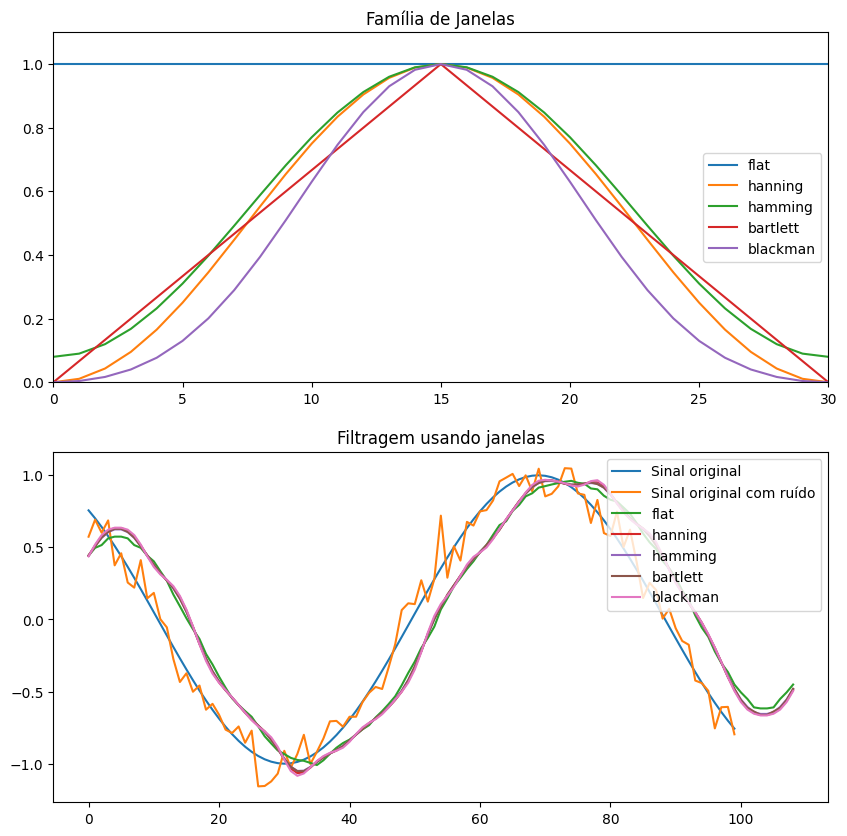

In [1]:
import numpy
from numpy import *
from matplotlib.pylab import *


def smooth(x,window_len=21,window='hanning'):
    if x.ndim != 1:
        raise print(ValueError, "smooth only accepts 1 dimension arrays.")
    if x.size < window_len:
        raise print(ValueError, "Input vector needs to be bigger than window size.")
    if window_len<3:
        return x
    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise print(ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")

    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    
    if window == 'flat': 
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y


t=linspace(-4,4,100)
x=sin(t)
xn=x+randn(len(t))*0.1
y=smooth(x)

ws=31

figure(figsize = (10,10))

subplot(211)
plot(ones(ws))

windows=['flat', 'hanning', 'hamming', 'bartlett', 'blackman']

for w in windows[1:]:
    eval('plot('+w+'(ws) )')

axis([0,30,0,1.1])

legend(windows)
title("Família de Janelas")
subplot(212)
plot(x)
plot(xn)
for w in windows:
    plot(smooth(xn,10,w))
l=['Sinal original', 'Sinal original com ruído']
l.extend(windows)

legend(l)
title("Filtragem usando janelas")
show()


### 2. Detalhe da janela - tempo/frequência

#### a. Janela de kaiser
#### b. $M=74$

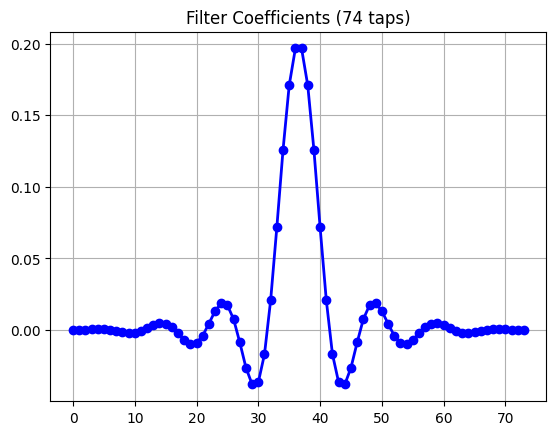

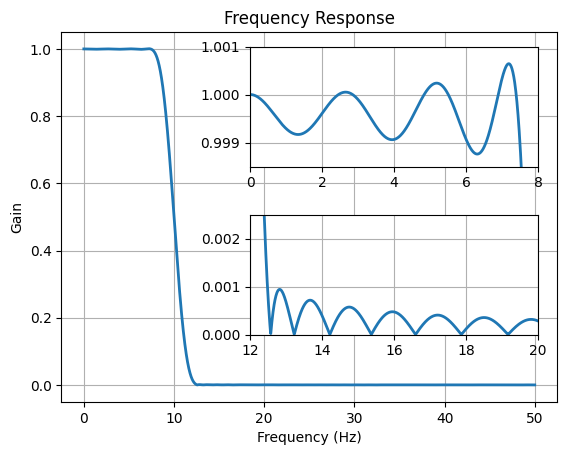

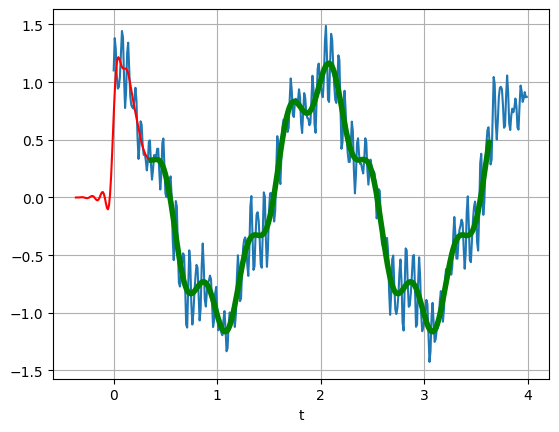

In [2]:
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show


#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------

sample_rate = 100.0
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)


#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 10.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)

#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------
#figure(figsize = (10,10))
figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)

#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------
#figure(figsize = (20,20))
figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

# Lower inset plot
ax2 = axes([0.42, 0.25, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(12.0, 20.0)
ylim(0.0, 0.0025)
grid(True)

#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate
#figure(figsize = (20,20))
figure(3)
# Plot the original signal.
plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4)

xlabel('t')
grid(True)

show()


## 3. Uso das Janelas em diferentes configurações de filtros

In [3]:
from scipy import signal
numtaps = 13



In [4]:
# Low-pass from 0 to f:
#
f = 0.1
signal.firwin(numtaps, f)

array([0.00679069, 0.01516873, 0.03947091, 0.07798288, 0.1211849 ,
       0.15528388, 0.16823602, 0.15528388, 0.1211849 , 0.07798288,
       0.03947091, 0.01516873, 0.00679069])

In [5]:
# Use a specific window function:
#
signal.firwin(numtaps, f, window='nuttall')

array([4.39330500e-05, 1.25923180e-03, 1.11408972e-02, 4.67624843e-02,
       1.18823402e-01, 2.01967943e-01, 2.40004218e-01, 2.01967943e-01,
       1.18823402e-01, 4.67624843e-02, 1.11408972e-02, 1.25923180e-03,
       4.39330500e-05])

In [6]:
# Band-pass:
#
f1, f2 = 0.1, 0.2
signal.firwin(numtaps, [f1, f2], pass_zero=False)

array([-0.01955552, -0.02699707, -0.02683301,  0.02436791,  0.13329945,
        0.24931866,  0.29942389,  0.24931866,  0.13329945,  0.02436791,
       -0.02683301, -0.02699707, -0.01955552])

In [7]:
# Band-stop:
#
signal.firwin(numtaps, [f1, f2])

array([ 0.00964459,  0.0133147 ,  0.01323378, -0.01201802, -0.06574202,
       -0.12296159,  1.32905711, -0.12296159, -0.06574202, -0.01201802,
        0.01323378,  0.0133147 ,  0.00964459])

In [8]:
# Multi-band (passbands are [0, f1], [f2, f3] and [f4, 1]):
#
f3, f4 = 0.3, 0.4
signal.firwin(numtaps, [f1, f2, f3, f4])

array([-1.15829050e-17,  9.87419131e-18,  2.67129651e-02,  6.44528762e-02,
       -9.55589666e-17, -1.87334605e-01,  1.19233753e+00, -1.87334605e-01,
       -9.55589666e-17,  6.44528762e-02,  2.67129651e-02,  9.87419131e-18,
       -1.15829050e-17])

In [9]:
#Multi-band (passbands are [f1, f2] and [f3,f4]):
#
signal.firwin(numtaps, [f1, f2, f3, f4], pass_zero=False)

array([ 9.87666692e-18,  0.00000000e+00, -4.25188766e-02, -1.02589281e-01,
        5.07002235e-17,  2.98179439e-01,  4.74459237e-01,  2.98179439e-01,
        5.07002235e-17, -1.02589281e-01, -4.25188766e-02,  0.00000000e+00,
        9.87666692e-18])